In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/content/house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Preprocessing

## Dealing with Nan Values

In [3]:
nan_cols = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 500:
        nan_cols[j] = i
nan_cols

{'Alley': 1369,
 'MasVnrType': 872,
 'FireplaceQu': 690,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

These columns have too many missing values so we can't use them:

'Alley': 1369,

'MasVnrType': 872,

'FireplaceQu': 690,

'PoolQC': 1453,

'Fence': 1179,

'MiscFeature': 1406

In [4]:
df.drop(list(nan_cols.keys()), axis = 1,inplace = True)

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
df.dtypes['MSZoning']

dtype('O')

In [7]:
nan_rows = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 0:
        nan_rows[j] = i
nan_rows

{'LotFrontage': 259,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

In [8]:
nan_obj_col = df[list(nan_rows.keys())].select_dtypes(include = 'object').columns

In [9]:
nan_obj_col

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [10]:
for col in nan_obj_col:
     df[col] = df[col].fillna(df[col].value_counts().keys()[0])

In [11]:
nan_rows = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 0:
        nan_rows[j] = i
nan_rows

{'LotFrontage': 259, 'MasVnrArea': 8, 'GarageYrBlt': 81}

In [12]:
for col in nan_rows.keys():
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df.isna().sum().sum()

0

Hence No Null values left

## Dealing with duplicates

In [14]:
df.duplicated().sum()

0

Hence, no duplicated rows

## Applying Label Encoder

In [15]:
obj_cols = df.select_dtypes(include = 'object').columns

In [16]:
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

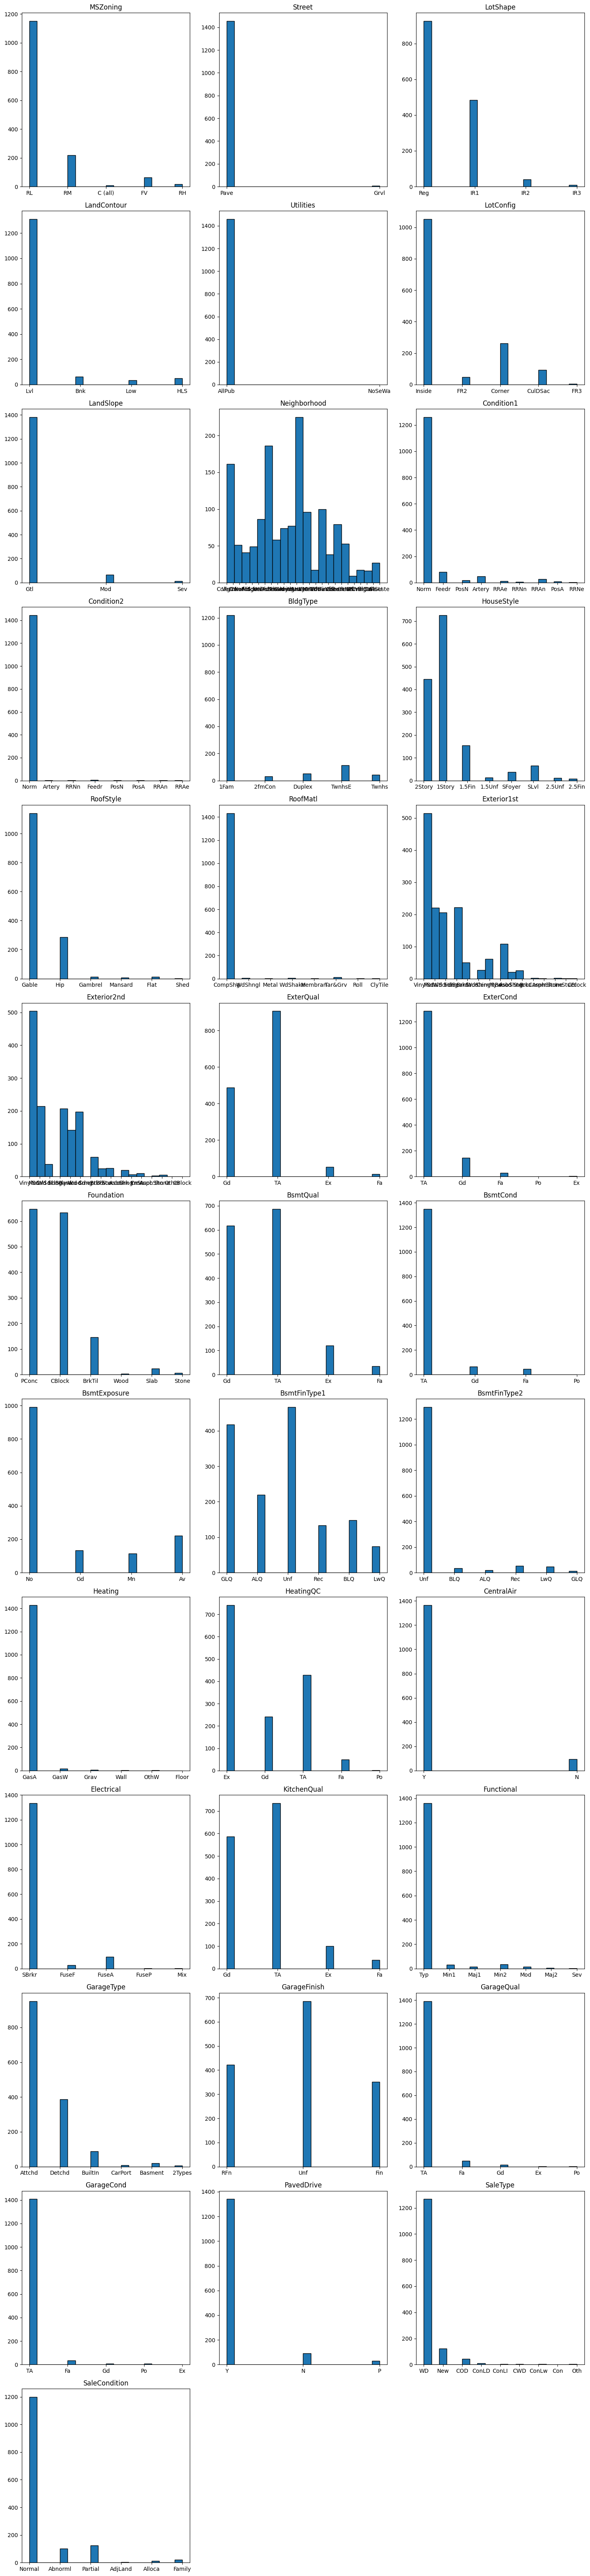

In [17]:
plt.figure(figsize=(15, 5 * 13))
for i,col in enumerate(obj_cols):
    plt.subplot(13,3,i+1)
    plt.hist(df[col],bins = 20, edgecolor = 'black')
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
les = dict()
for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df[col] += 0.5
    les[col] = le

In [19]:
numerical_col =  []
for col in df.columns:
    if col not in obj_cols:
        numerical_col.append(col)
print(numerical_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


since last col is prediction col

In [20]:
numerical_col = numerical_col[:-1]

outliers removal after data visualization

# Data Visualization

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

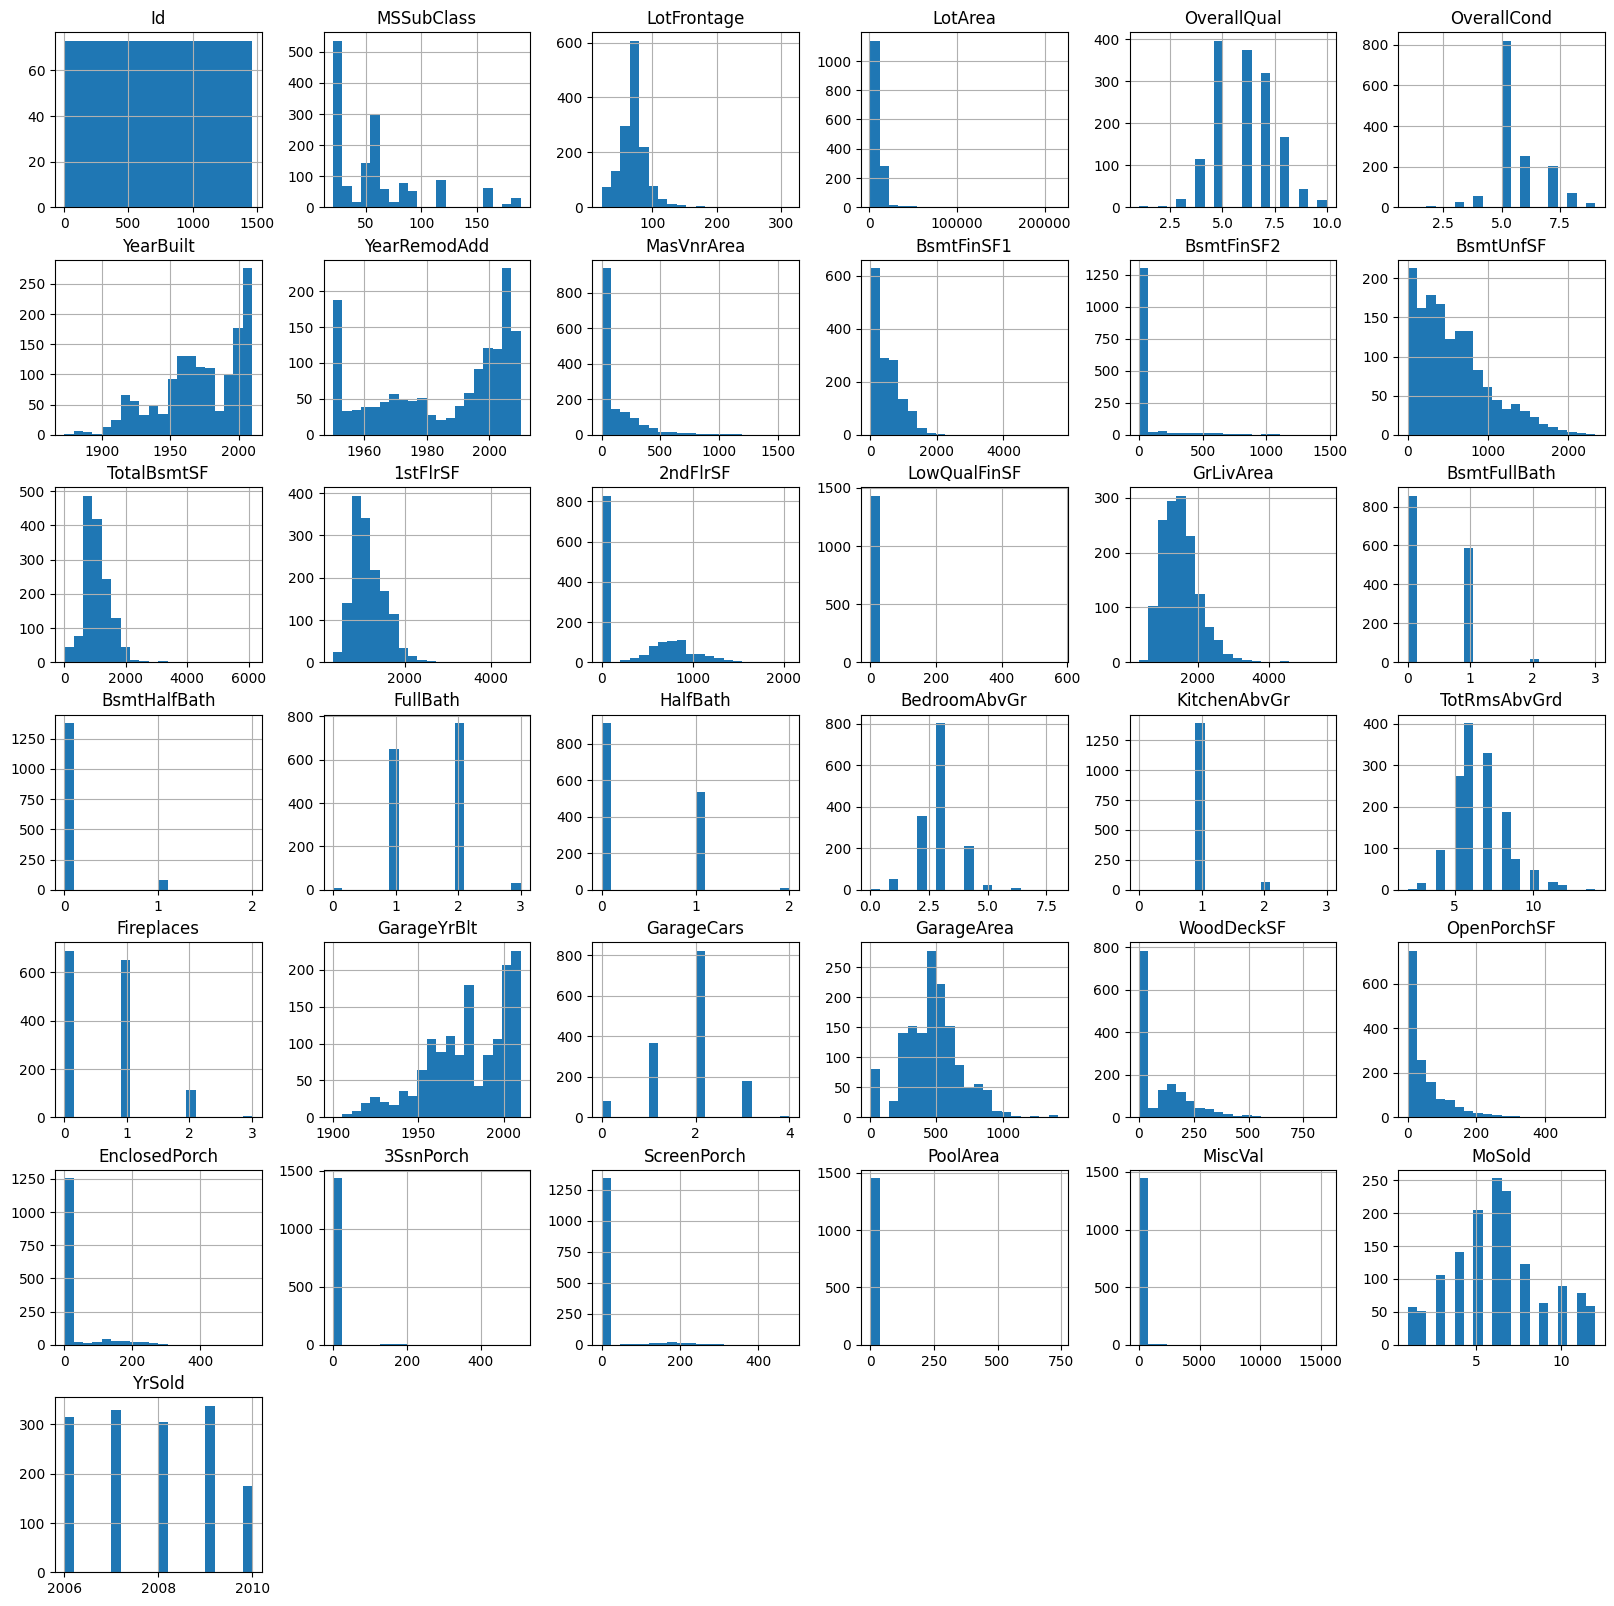

In [21]:
df[numerical_col].hist(bins = 20,figsize = (20,20))

In [22]:
continous_cols = ['MSSubClass','LotFrontage','LotArea','YearBuilt','TotalBsmtSF','BsmtUnfSF',
                  'BsmtFinSF2','BsmtFinSF1','YearRemodAdd','MasVnrArea','1stFlrSF', '2ndFlrSF',
                  'LowQualFinSF','GrLivArea', 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']

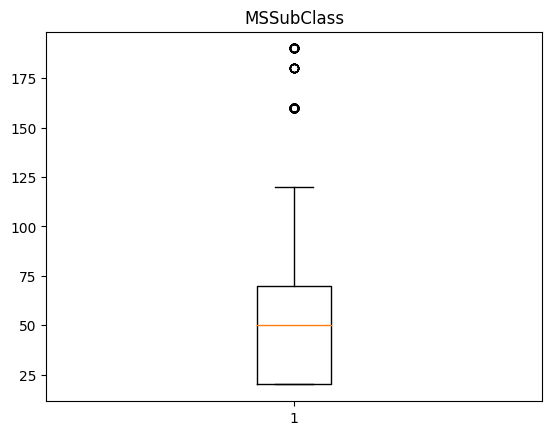

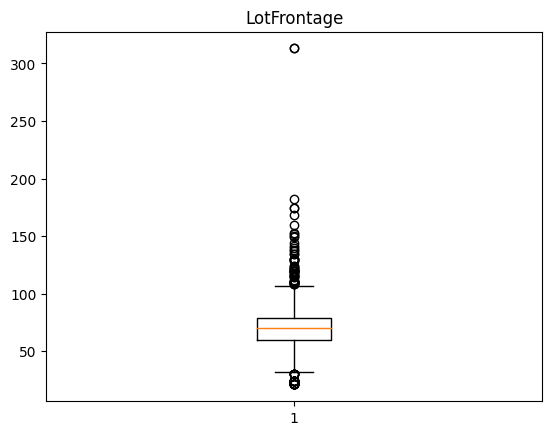

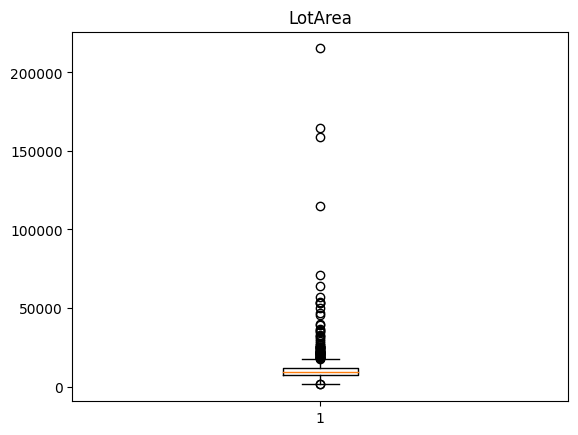

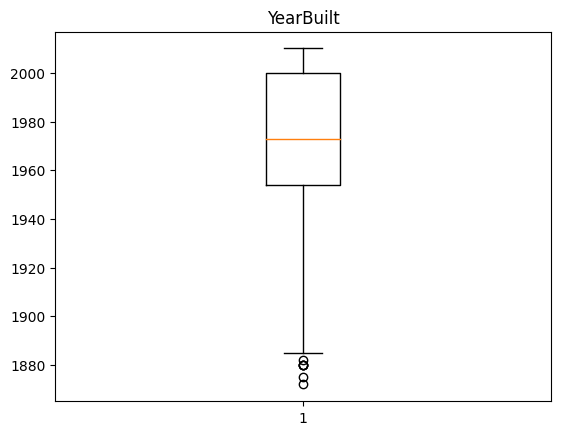

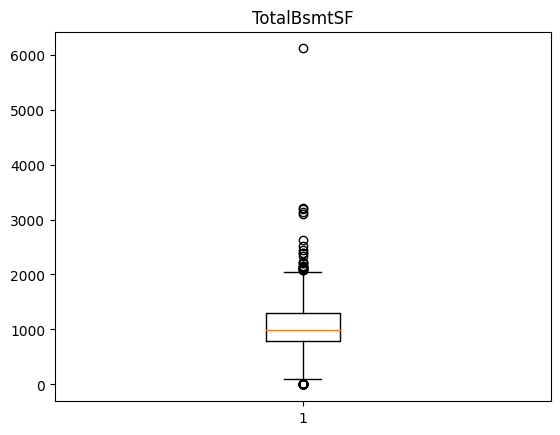

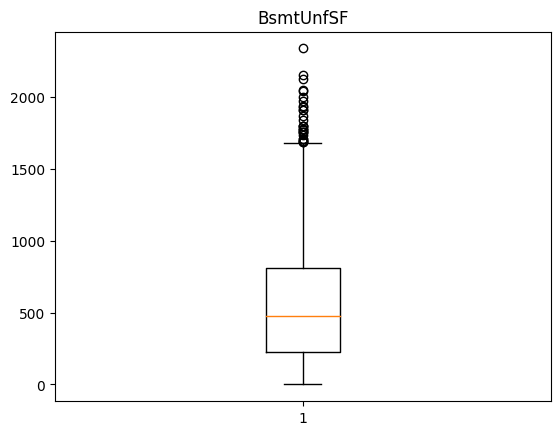

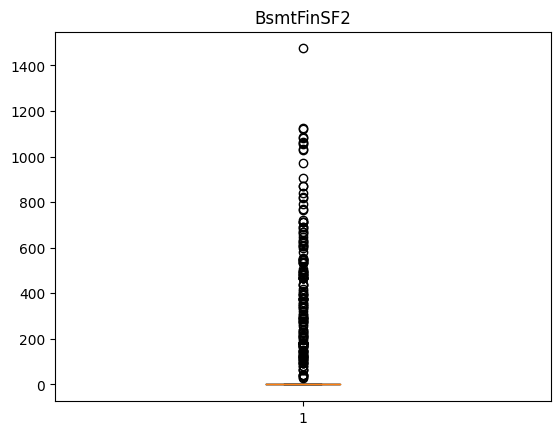

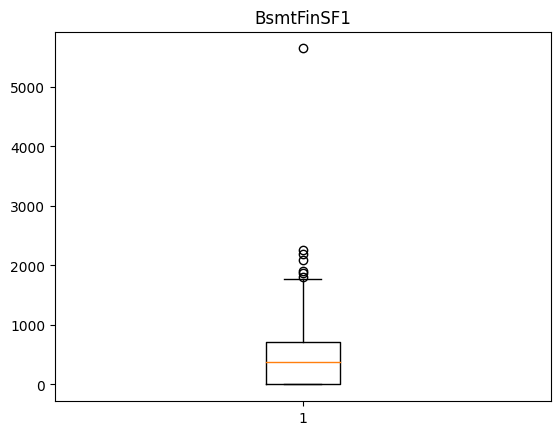

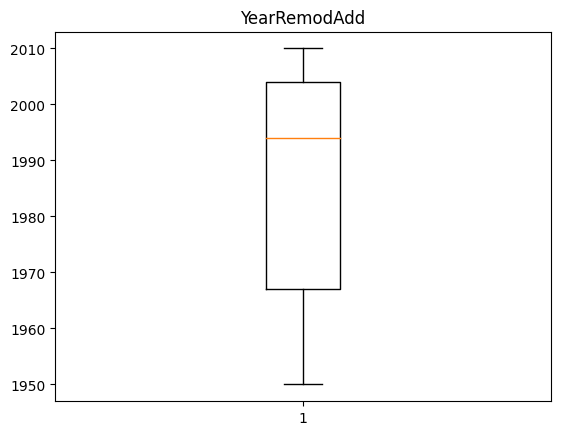

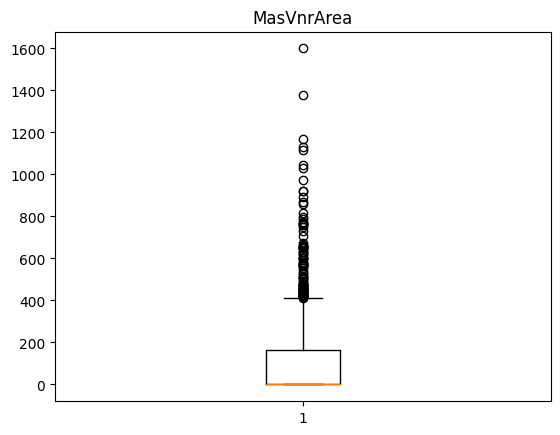

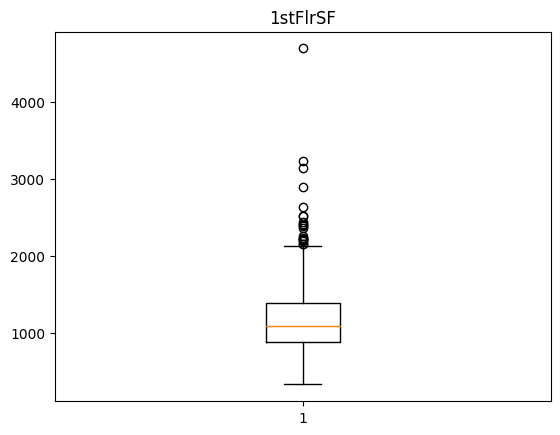

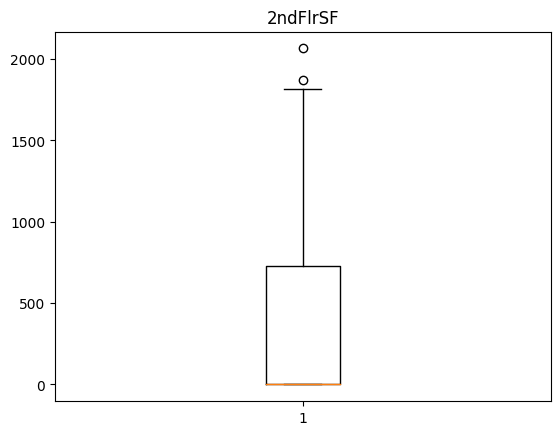

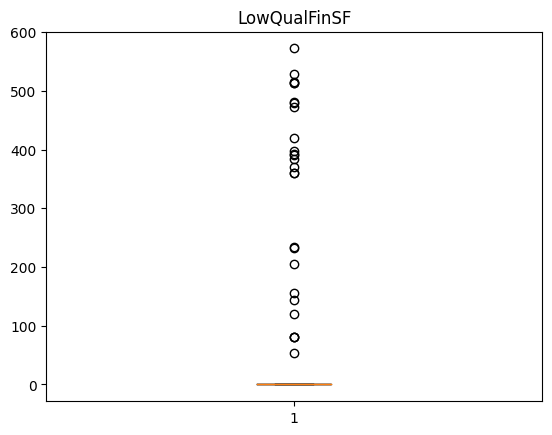

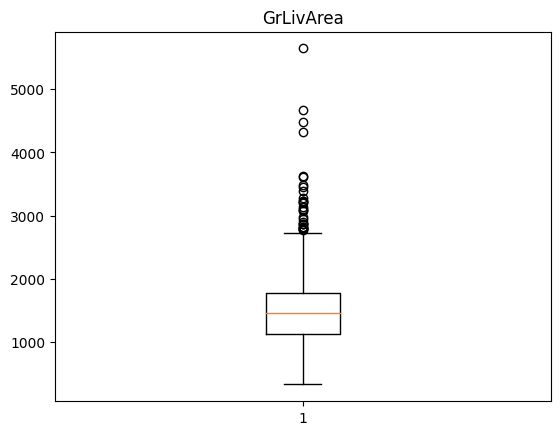

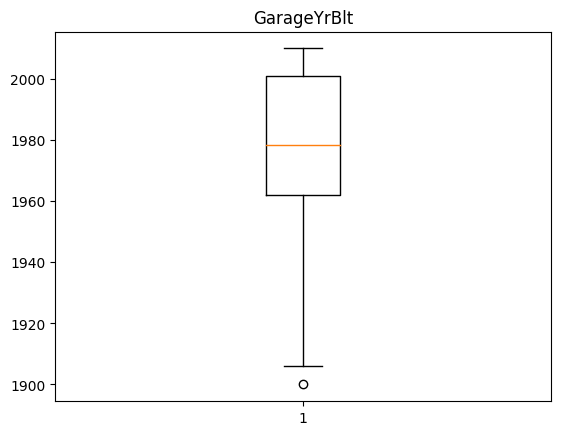

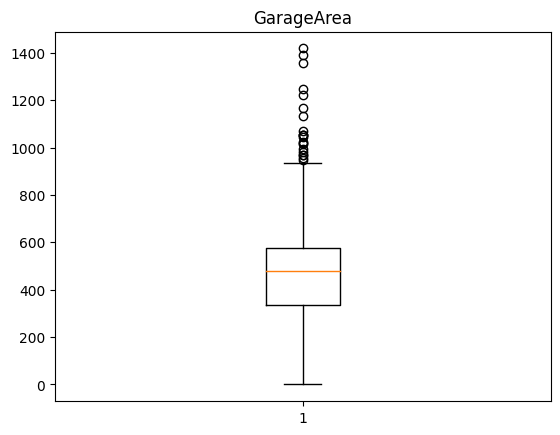

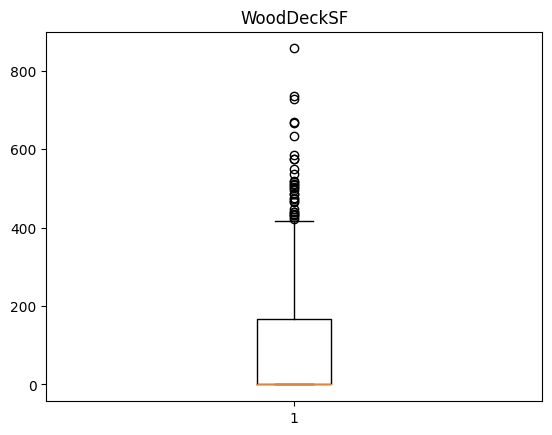

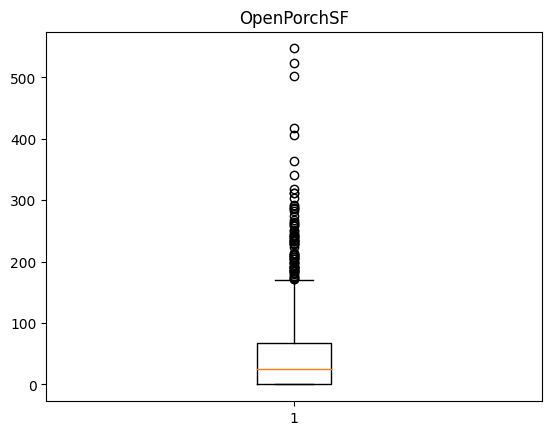

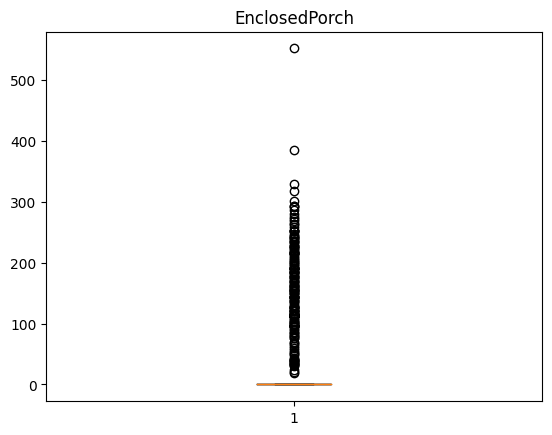

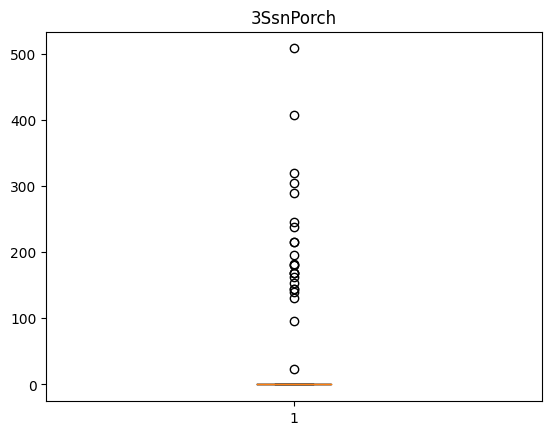

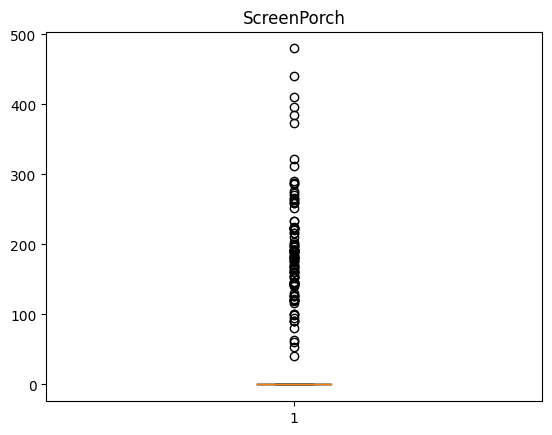

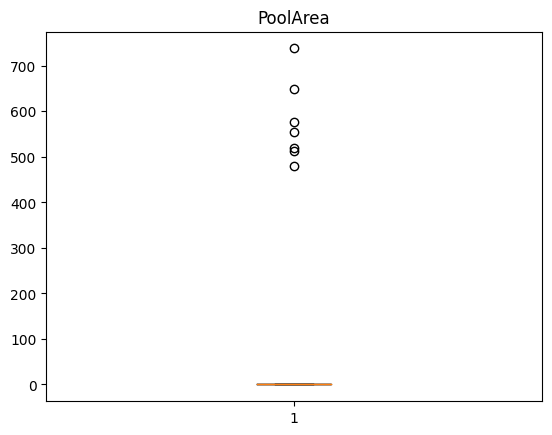

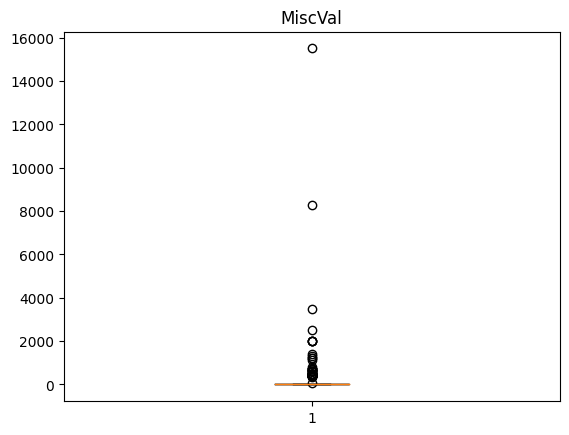

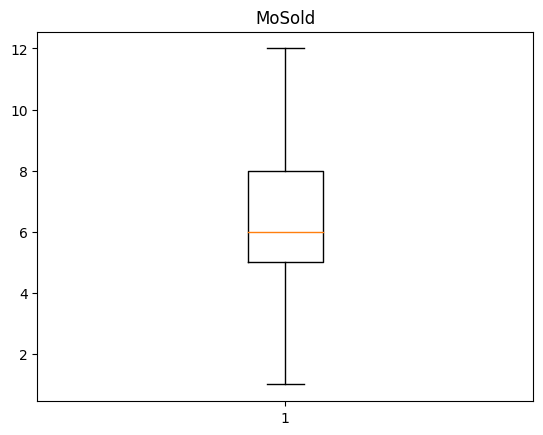

In [23]:
import seaborn as sns

for col in continous_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

# Outlier Detection and Removal

In [24]:
outlier_detection_on_col = ['MSSubClass','LotFrontage','LotArea','YearBuilt','TotalBsmtSF','BsmtUnfSF',
                  'BsmtFinSF2','BsmtFinSF1','MasVnrArea','1stFlrSF', '2ndFlrSF',
                  'LowQualFinSF','GrLivArea', 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
means = np.mean(df[outlier_detection_on_col],axis = 0)
threshold = 3
std = np.std(df[outlier_detection_on_col],axis = 0)
z_scores = np.abs((df[outlier_detection_on_col] - means)/ std)
outliers = np.where(z_scores>threshold)[0]
print(len(outliers))

428


In [25]:
df.drop(outliers,axis= 0,inplace = True)

In [26]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.5,65.0,8450,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,2,2008,8.5,4.5,208500
1,2,20,3.5,80.0,9600,1.5,3.5,3.5,0.5,2.5,...,0,0,0,0,0,5,2007,8.5,4.5,181500
2,3,60,3.5,68.0,11250,1.5,0.5,3.5,0.5,4.5,...,0,0,0,0,0,9,2008,8.5,4.5,223500
4,5,60,3.5,84.0,14260,1.5,0.5,3.5,0.5,2.5,...,0,0,0,0,0,12,2008,8.5,4.5,250000
6,7,20,3.5,75.0,10084,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,8,2007,8.5,4.5,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,4.5,35.0,3675,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,5,2006,8.5,4.5,145000
1453,1454,20,3.5,90.0,17217,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,7,2006,8.5,0.5,84500
1454,1455,20,1.5,62.0,7500,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,10,2009,8.5,4.5,185000
1455,1456,60,3.5,62.0,7917,1.5,3.5,3.5,0.5,4.5,...,0,0,0,0,0,8,2007,8.5,4.5,175000


# Correlation

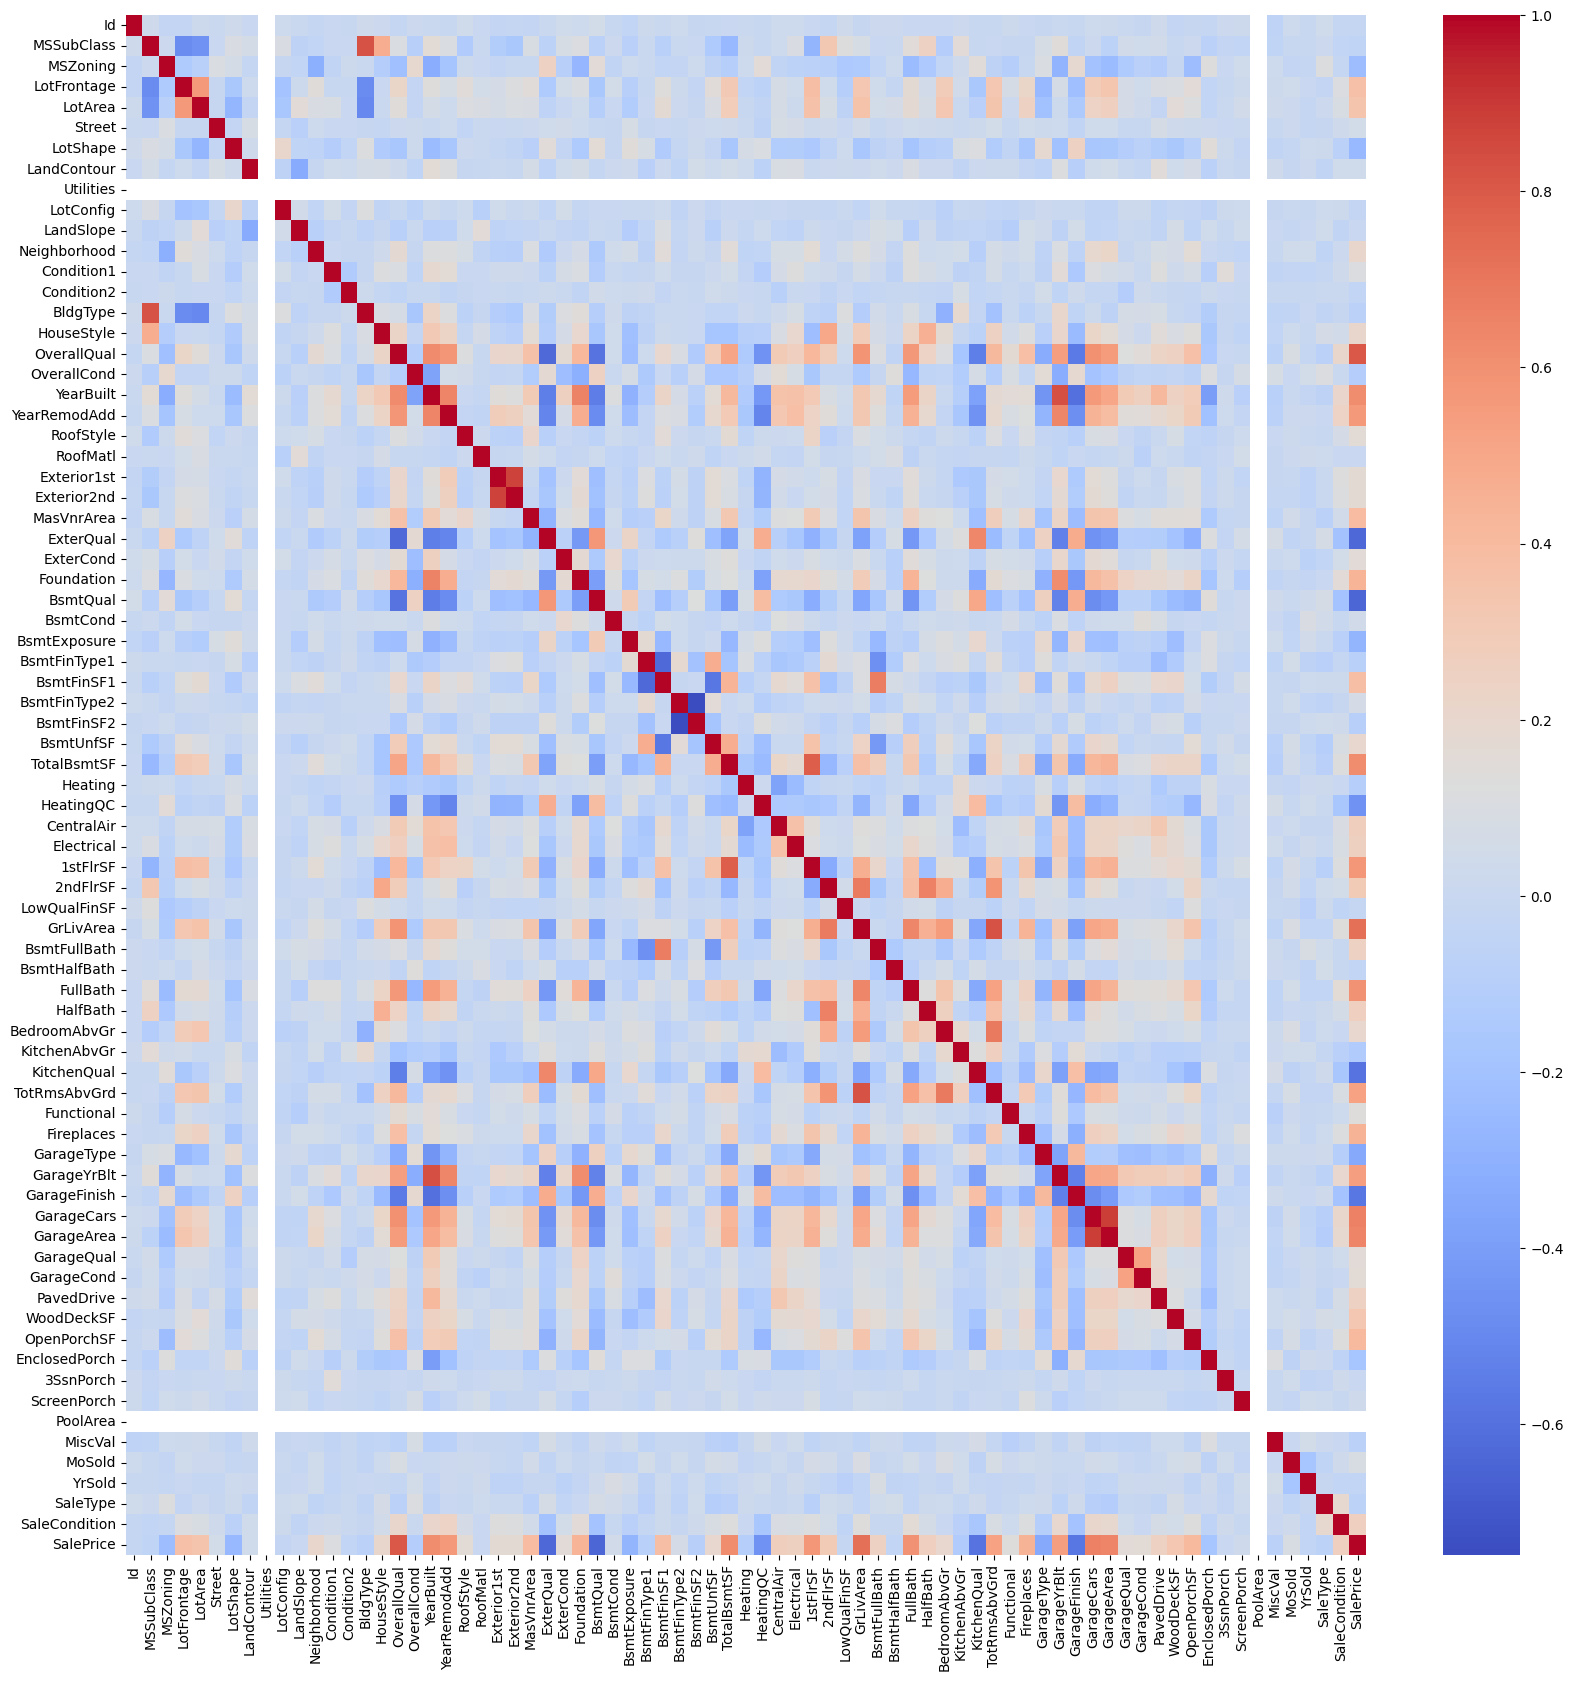

In [27]:
_, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),cmap = 'coolwarm',ax=ax)
plt.show()

# Mutal Information

In [28]:
from sklearn.feature_selection import mutual_info_regression

In [29]:
mutual_info = mutual_info_regression(df.drop(['SalePrice'],axis = 1),df['SalePrice'],random_state = 42)

In [30]:
dc = dict()
for col, val in zip(df.columns[:-1],mutual_info):
    dc[col] = [val]

In [31]:
dc = pd.DataFrame(dc)

In [32]:
less_mutual_info_col = dc.iloc[:,(mutual_info <= 0.01) & (mutual_info >= -0.01)].columns

In [33]:
less_mutual_info_col

Index(['Id', 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofStyle',
       'RoofMatl', 'BsmtFinType2', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', 'Functional', '3SsnPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [34]:
df.loc[:,(df.corr()['SalePrice']<= 0.025) & (df.corr()['SalePrice'] >= -0.025)].columns

Index(['Id', 'LandSlope', 'RoofMatl', 'LowQualFinSF', '3SsnPorch'], dtype='object')

Now, selecting the columns with both less correlation with SalePrice less than 0.025 and less mutual info less than 0.01

In [35]:
remov_col = ['Street','BsmtHalfBath','MiscVal','YrSold']

In [36]:
df.drop(remov_col,axis = 1,inplace = True)

In [37]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,3.5,65.0,8450,3.5,3.5,0.5,4.5,0.5,...,0,61,0,0,0,0,2,8.5,4.5,208500
1,2,20,3.5,80.0,9600,3.5,3.5,0.5,2.5,0.5,...,298,0,0,0,0,0,5,8.5,4.5,181500
2,3,60,3.5,68.0,11250,0.5,3.5,0.5,4.5,0.5,...,0,42,0,0,0,0,9,8.5,4.5,223500
4,5,60,3.5,84.0,14260,0.5,3.5,0.5,2.5,0.5,...,192,84,0,0,0,0,12,8.5,4.5,250000
6,7,20,3.5,75.0,10084,3.5,3.5,0.5,4.5,0.5,...,255,57,0,0,0,0,8,8.5,4.5,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,4.5,35.0,3675,3.5,3.5,0.5,4.5,0.5,...,0,28,0,0,0,0,5,8.5,4.5,145000
1453,1454,20,3.5,90.0,17217,3.5,3.5,0.5,4.5,0.5,...,36,56,0,0,0,0,7,8.5,0.5,84500
1454,1455,20,1.5,62.0,7500,3.5,3.5,0.5,4.5,0.5,...,0,113,0,0,0,0,10,8.5,4.5,185000
1455,1456,60,3.5,62.0,7917,3.5,3.5,0.5,4.5,0.5,...,0,40,0,0,0,0,8,8.5,4.5,175000


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X = sc.fit_transform(df)

In [40]:
scy = StandardScaler()
scy.fit([df['SalePrice']])

StandardScaler()

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 24)
x = pca.fit_transform(X[:,:-1],X[:,-1])
pca_df = pd.DataFrame(x)
pca_df['SalePrice'] = X[:,-1]
pca_df.corr()['SalePrice']

0            0.886818
1            0.075480
2           -0.157066
3            0.067935
4           -0.000385
5            0.175192
6            0.046414
7           -0.073807
8            0.029915
9            0.019768
10          -0.056828
11           0.037745
12          -0.002053
13          -0.031903
14          -0.032067
15           0.006651
16           0.000417
17          -0.023934
18           0.025349
19           0.048934
20          -0.015567
21          -0.011617
22          -0.022031
23          -0.029686
SalePrice    1.000000
Name: SalePrice, dtype: float64

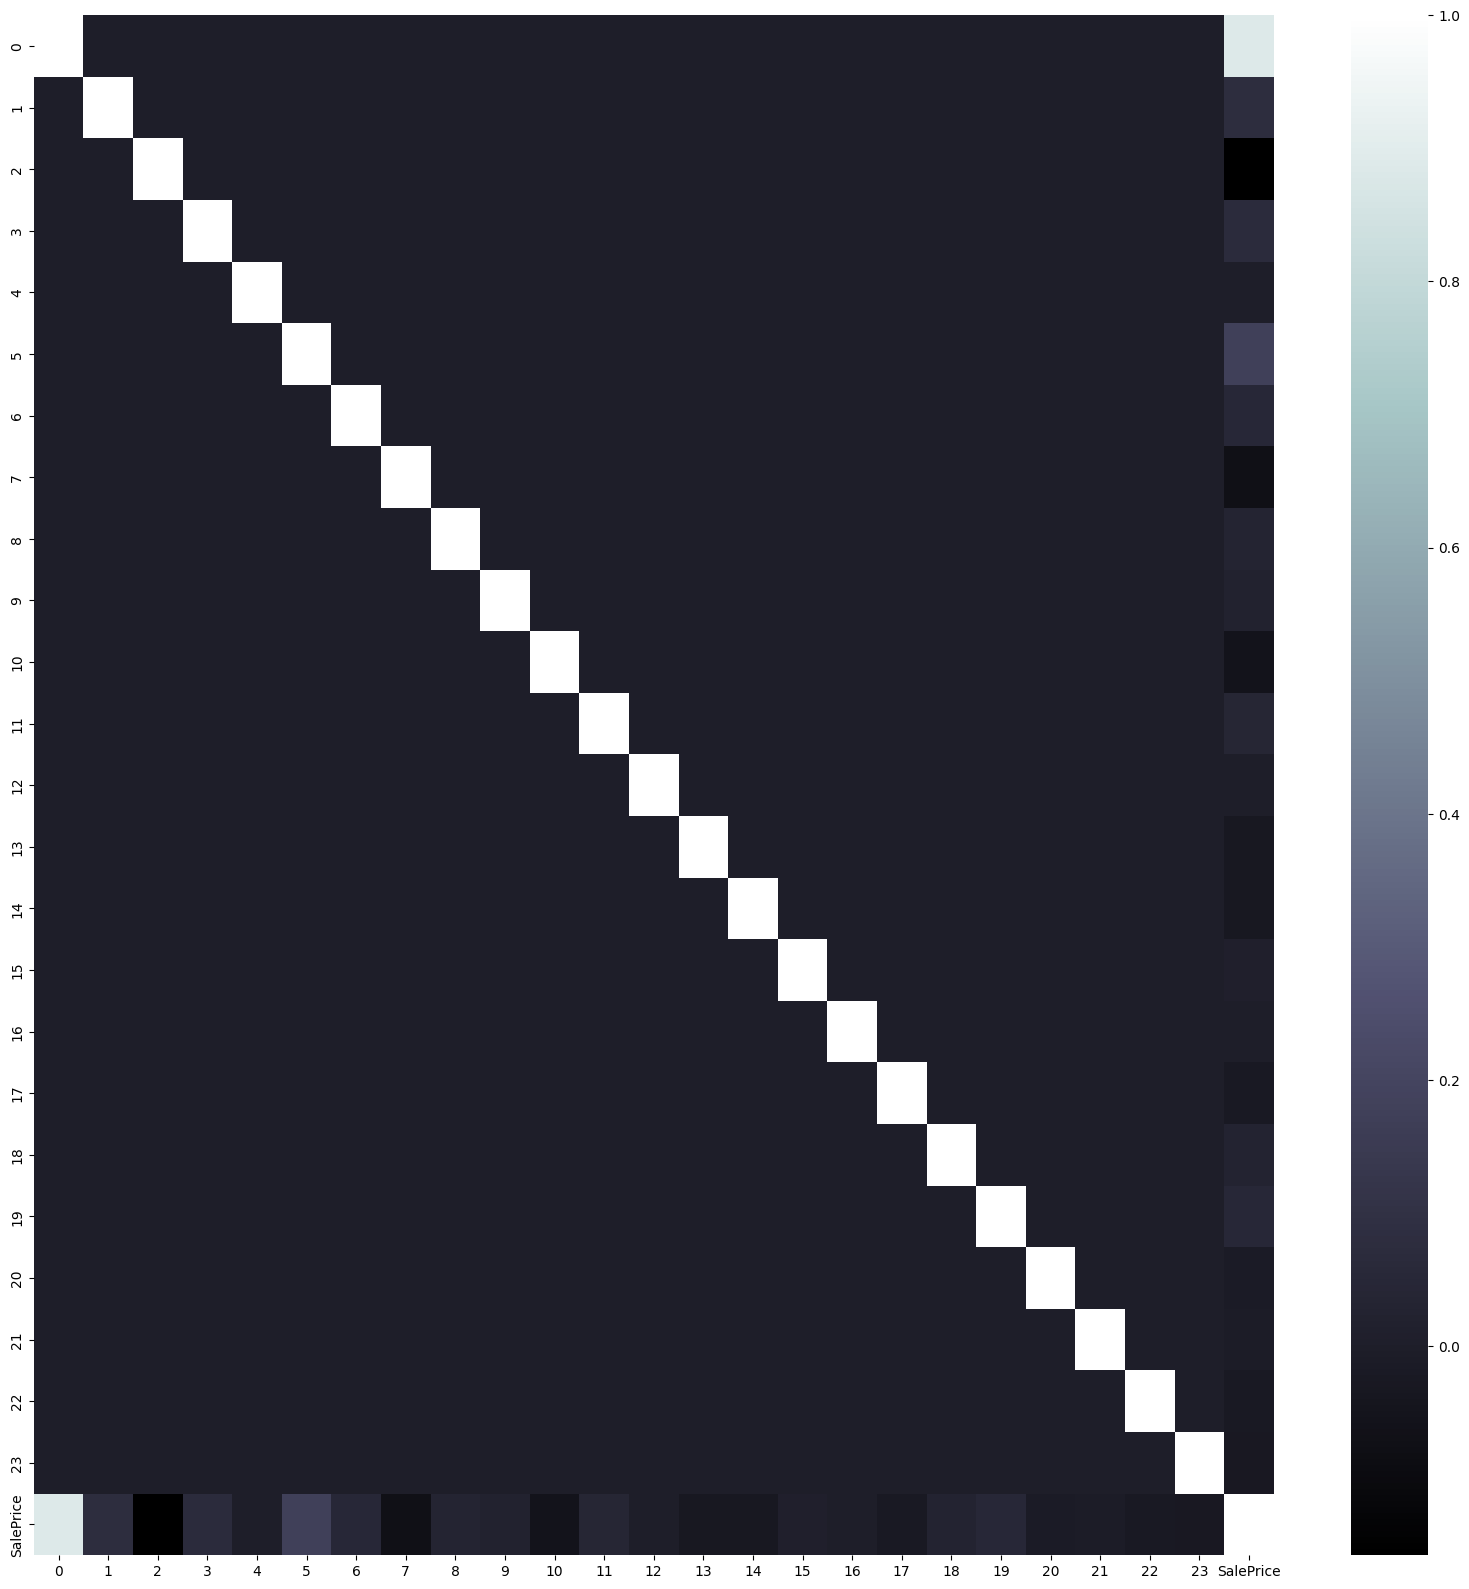

In [43]:
_, ax = plt.subplots(figsize = (20,20))
sns.heatmap(pca_df.corr(),cmap = 'bone',ax=ax)
plt.show()

# Splitting

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('SalePrice',axis = 1),pca_df['SalePrice'],test_size = 0.2)

# Linear Regression

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.1349529779541521
R2 :  0.8739030092162837


# Polymonial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [50]:
y_pred = lin2.predict(poly.transform(X_test))
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.6948558302237017
R2 :  0.35074252863470157


# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 1)
rr.fit(X_train,y_train)

Ridge(alpha=1)

In [52]:
y_pred = rr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.13492853183683526
R2 :  0.8739258511118589


# Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

lar = Lasso(alpha = 1)
lar.fit(X_train,y_train)

Lasso(alpha=1)

In [54]:
y_pred = lar.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.3248659832547821
R2 :  0.6964526198870675


# ARDRegression

In [55]:
from sklearn.linear_model import ARDRegression

ardr = ARDRegression()
ardr.fit(X_train,y_train)

ARDRegression()

In [56]:
y_pred = ardr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.13444371256034116
R2 :  0.8743788552082977
